In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns


In [2]:
df=pd.read_csv('/content/avocado.csv')

In [3]:
df.head()

,s.no,Date,AveragePrice,Total Volume,4046,4225,4770,Total Bags,Small Bags,Large Bags,XLarge Bags,type,year,region
0,0,27-12-2015,1.33,64236.62,1036.74,54454.85,48.16,8696.87,8603.62,93.25,0.0,conventional,2015,Albany
1,1,20-12-2015,1.35,54876.98,674.28,44638.81,58.33,9505.56,9408.07,97.49,0.0,conventional,2015,Albany
2,2,13-12-2015,0.93,118220.22,794.70,109149.67,130.50,8145.35,8042.21,103.14,0.0,conventional,2015,Albany
3,3,06-12-2015,1.08,78992.15,1132.00,71976.41,72.58,5811.16,5677.40,133.76,0.0,conventional,2015,Albany
4,4,29-11-2015,1.28,51039.60,941.48,43838.39,75.78,6183.95,5986.26,197.69,0.0,conventional,2015,Albany


In [4]:
df.isnull().sum()

s.no            0
Date            0
AveragePrice    0
Total Volume    0
4046            0
4225            0
4770            0
Total Bags      0
Small Bags      0
Large Bags      0
XLarge Bags     0
type            0
year            0
region          0
dtype: int64

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 18249 entries, 0 to 18248
Data columns (total 14 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   s.no          18249 non-null  int64  
 1   Date          18249 non-null  object 
 2   AveragePrice  18249 non-null  float64
 3   Total Volume  18249 non-null  float64
 4   4046          18249 non-null  float64
 5   4225          18249 non-null  float64
 6   4770          18249 non-null  float64
 7   Total Bags    18249 non-null  float64
 8   Small Bags    18249 non-null  float64
 9   Large Bags    18249 non-null  float64
 10  XLarge Bags   18249 non-null  float64
 11  type          18249 non-null  object 
 12  year          18249 non-null  int64  
 13  region        18249 non-null  object 
dtypes: float64(9), int64(2), object(3)
memory usage: 1.9+ MB


In [6]:
df.describe()

,s.no,AveragePrice,Total Volume,4046,4225,4770,Total Bags,Small Bags,Large Bags,XLarge Bags,year
count,18249.000000,18249.000000,1.824900e+04,1.824900e+04,1.824900e+04,1.824900e+04,1.824900e+04,1.824900e+04,1.824900e+04,18249.000000,18249.000000
mean,24.232232,1.405978,8.506440e+05,2.930084e+05,2.951546e+05,2.283974e+04,2.396392e+05,1.821947e+05,5.433809e+04,3106.426507,2016.147899
std,15.481045,0.402677,3.453545e+06,1.264989e+06,1.204120e+06,1.074641e+05,9.862424e+05,7.461785e+05,2.439660e+05,17692.894652,0.939938
min,0.000000,0.440000,8.456000e+01,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000,2015.000000
25%,10.000000,1.100000,1.083858e+04,8.540700e+02,3.008780e+03,0.000000e+00,5.088640e+03,2.849420e+03,1.274700e+02,0.000000,2015.000000
50%,24.000000,1.370000,1.073768e+05,8.645300e+03,2.906102e+04,1.849900e+02,3.974383e+04,2.636282e+04,2.647710e+03,0.000000,2016.000000
75%,38.000000,1.660000,4.329623e+05,1.110202e+05,1.502069e+05,6.243420e+03,1.107834e+05,8.333767e+04,2.202925e+04,132.500000,2017.000000
max,52.000000,3.250000,6.250565e+07,2.274362e+07,2.047057e+07,2.546439e+06,1.937313e+07,1.338459e+07,5.719097e+06,551693.650000,2018.000000


In [7]:
df.shape

(18249, 14)

In [8]:
df.drop(['4046','4225','4770'], axis='columns', inplace=True)


In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 18249 entries, 0 to 18248
Data columns (total 11 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   s.no          18249 non-null  int64  
 1   Date          18249 non-null  object 
 2   AveragePrice  18249 non-null  float64
 3   Total Volume  18249 non-null  float64
 4   Total Bags    18249 non-null  float64
 5   Small Bags    18249 non-null  float64
 6   Large Bags    18249 non-null  float64
 7   XLarge Bags   18249 non-null  float64
 8   type          18249 non-null  object 
 9   year          18249 non-null  int64  
 10  region        18249 non-null  object 
dtypes: float64(6), int64(2), object(3)
memory usage: 1.5+ MB


#we will focus on Average Price and find relationship between it and other feature.

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


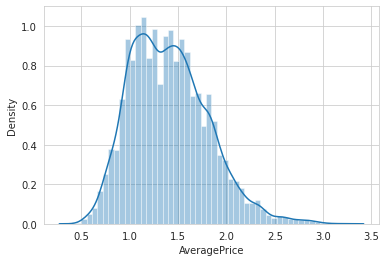

In [10]:
sns.set_style('whitegrid')
sns.distplot(df.AveragePrice)

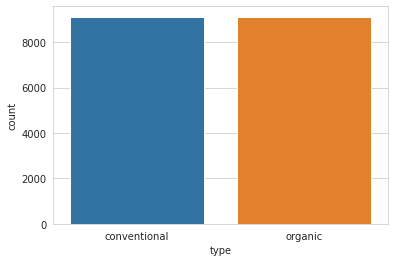

In [11]:
sns.countplot(x='type',data=df)

* There are two types of avocados in the data: organic and conventional, so let’s see how many each one.

In [12]:
df.value_counts('type')

type
conventional    9126
organic         9123
dtype: int64

Text(0.5, 1.0, "Average Price of Avocado's of each type")

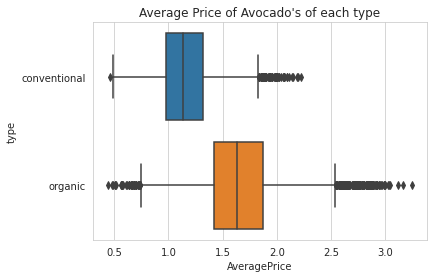

In [13]:
sns.boxplot(y='type',x='AveragePrice',data=df)
plt.title("Average Price of Avocado's of each type")

* Organic price is expensive than the conventional price.


Text(0.5, 1.0, 'Avocado Price in Different Regions')

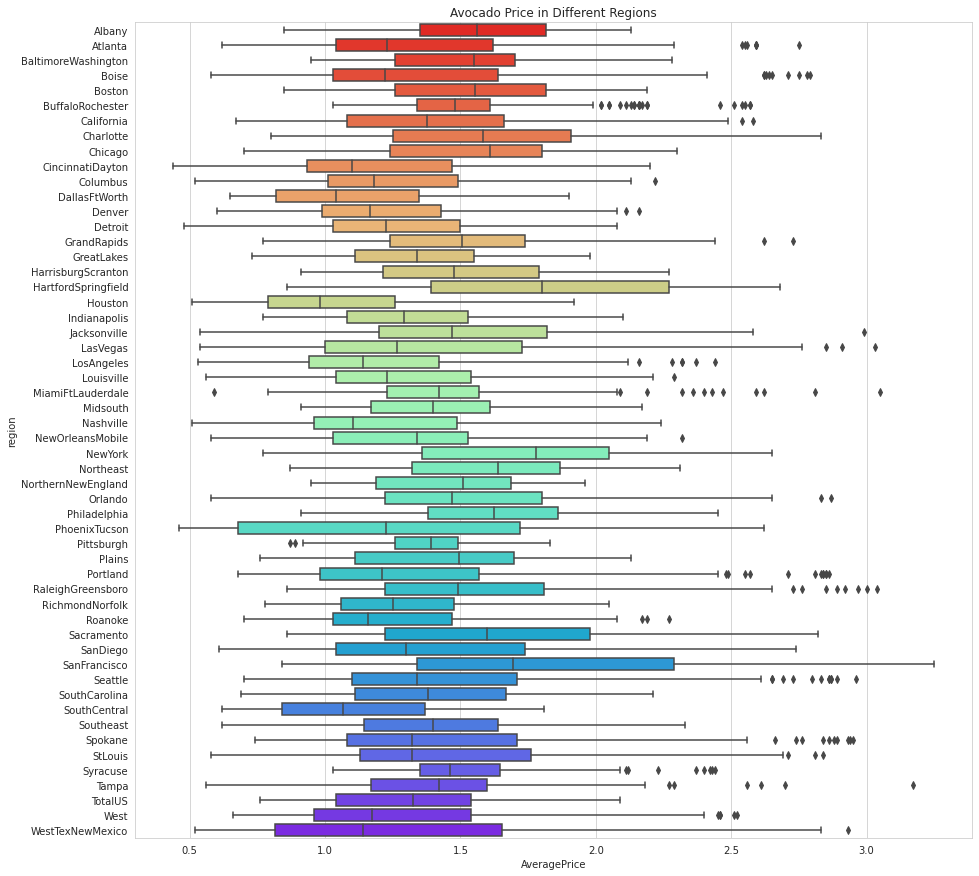

In [14]:
plt.figure(figsize=(15,15))
sns.boxplot(y='region',x='AveragePrice',data=df,palette='rainbow_r')
plt.title("Avocado Price in Different Regions")

* Regarding the prices relative to the regions, we find that San Francisco is the most expensive city to sell avocados in general, Houston is the cheapest area to sell.

In [15]:
organic_df=df[df["type"]=="organic"]
conven_df=df[df["type"]=="conventional"]

Text(0.5, 1.0, 'Average Price of Organic Avocado')

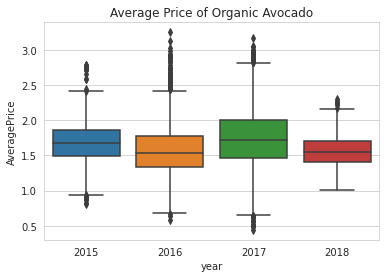

In [16]:

sns.boxplot(x="year",y="AveragePrice",data=organic_df)
plt.title("Average Price of Organic Avocado")



Text(0.5, 1.0, 'Average Price of Conventional Avocado')

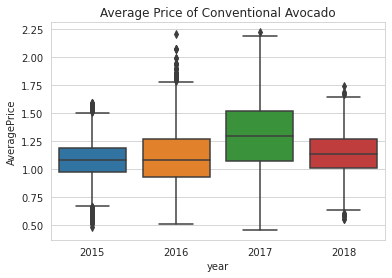

In [17]:
sns.boxplot(x="year",y="AveragePrice",data=conven_df)
plt.title('Average Price of Conventional Avocado')

* Average price of organic
avocados is generally always higher than conventional
avocados.


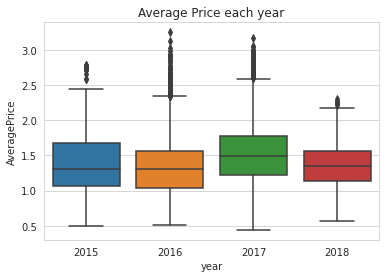

In [18]:
plt.title("Average Price each year")
sns.boxplot(x="year",y="AveragePrice",data=df)

Text(0.5, 1.0, 'Total Volume Per Type & Year of Avocado')

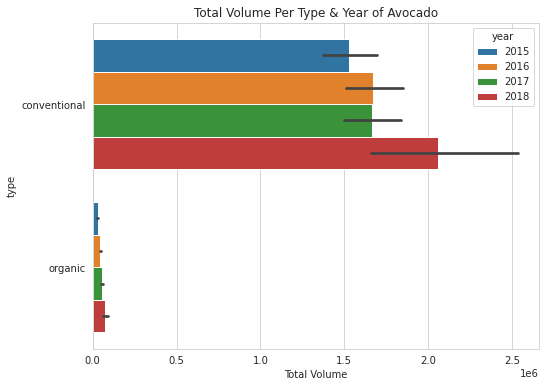

In [19]:
plt.figure(figsize=(8,6))
sns.barplot(y="type",x="Total Volume",hue="year",data=df)
plt.title("Total Volume Per Type & Year of Avocado")

* We can see that the total volume output of
conventional avocados far outnumbers the total volume
output of organic avocados
*  total volume output of both conventional and organic avocados
has grown steadily year after year.